In [2]:
#from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
#import os
#from os.path import exists
####################you will need to change some paths here!#####################
#output files
filename_out_nc='F:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/saildrone-gen_4-baja_2018-EP-sd1002-ALL-1_min-v1.nc'
#F:/data/cruise_data/saildrone/baja-2018/data_so_far.kml'
#################################################################################
import datetime as dt
import xarray as xr
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
#from netCDF4 import Dataset, date2index, num2date
from palettable import colorbrewer
#from datetime import datetime, timedelta
#import requests


In [3]:
#import datetime as dt
#from datetime import datetime
#from math import atan2
from palettable import colorbrewer
from copy import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors
#import matplotlib.mlab as mlaba
palette = copy(plt.cm.jet)
palette.set_over('r', 1.0)
palette.set_under('g', 1.0)
palette.set_bad(alpha = 0.0)

filename_out_nc='F:/data/cruise_data/saildrone/baja-2018/saildrone-gen_4-baja_2018-sd1002-20180411T180000-20180611T055959-1_minutes-v1.nc'
dataset = xr.open_dataset(filename_out_nc)
dataset = dataset.isel(trajectory=0)
ilen=(len(dataset.latitude['obs']))
lats_usv=dataset.latitude #[0,:]
lons_usv=dataset.longitude #[0,:]
print(lats_usv.shape)
tdim=len(lats_usv)
#dataset.time.dt.dayofyear

(86839,)


In [3]:
i=104
filename = 'F:/data/cruise_data/saildrone/baja-2018/sat_data/virs_sst/sst'+str(i)+'.nc'
ds0 = xr.open_dataset(filename)
ds = xr.open_dataset(filename)
if i==104:
    ds2 = ds
else:
    ds2 = ds2.where(np.isfinite(ds2.sea_surface_temperature),ds.sea_surface_temperature)
i=105
filename = 'F:/data/cruise_data/saildrone/baja-2018/sat_data/virs_sst/sst'+str(i)+'.nc'
ds1 = xr.open_dataset(filename)
ds = xr.open_dataset(filename)
if i==103:
    ds2 = ds
else:
#    ds2 = ds2.where(np.isfinite(ds2.sea_surface_temperature),ds.sea_surface_temperature)
    ds2 = ds.where(np.isfinite(ds.sea_surface_temperature),ds2.sea_surface_temperature)

#nan overwrite with new data
ii,jj = -1,400
print(ds0.sea_surface_temperature[ii,jj].data,ds1.sea_surface_temperature[ii,jj].data)
print(ds2.sea_surface_temperature[ii,jj].data)#old overwrite with new data
ii,jj = -400,200
print(ds0.sea_surface_temperature[ii,jj].data,ds1.sea_surface_temperature[ii,jj].data)
print(ds2.sea_surface_temperature[ii,jj].data)

293.78998 293.93
293.93
289.925 290.16998
290.16998


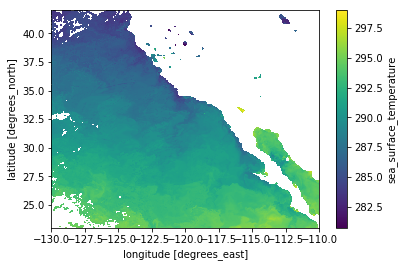

In [4]:
ds2.sea_surface_temperature.plot()

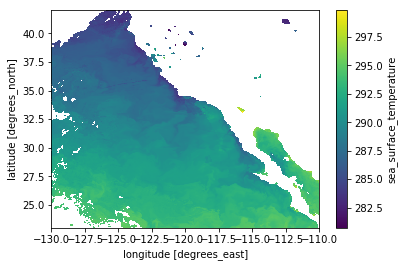

In [15]:
ds1.sea_surface_temperature.plot()

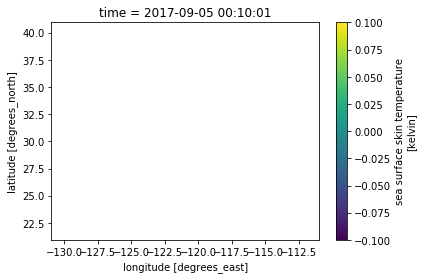

In [5]:
url = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.4/2017/248/20170905000000-OSPO-L3U_GHRSST-SSTskin-VIIRS_NPP-ACSPO_V2.40_0.02-v02.0-fv01.0.nc'
url = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.4/2017/248/20170905001000-OSPO-L3U_GHRSST-SSTskin-VIIRS_NPP-ACSPO_V2.40_0.02-v02.0-fv01.0.nc'
ds = xr.open_dataset(url)
subset = ds.sel(lat=slice(40.95,20.95),lon=slice(-130.95,-110.95)).isel(time=0).sortby('lat')
subset.sea_surface_temperature.plot()
#subset.sea_surface_temperature.plot()
#ds = xr.open_dataset(url,drop_variables={'analysed_sst','analysis_error','sea_ice_fraction'})
#ds.mask[0,:,:].plot()

#land = xr.open_dataset(url,drop_variables={'sea_surface_temperatuer'})


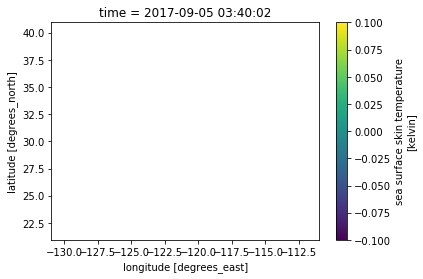

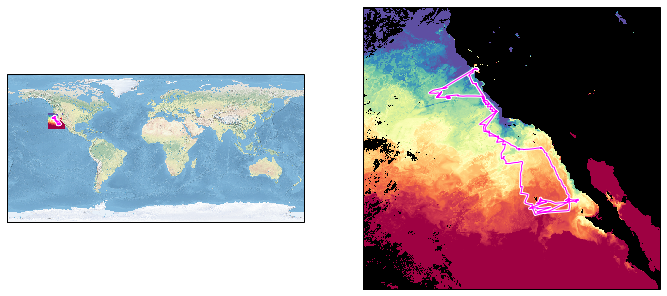

In [38]:
import cartopy.crs as ccrs
from cartopy.examples.arrows import sample_data
#import matplotlib.pyplot.pcolormesh as cmap
sub_lons=lons_usv
sub_lats=lats_usv
lat,lon=ds2.lat,ds2.lon
cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap
cmap1 = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap

fig = plt.figure(figsize=(11.7,8.3))

ax = plt.subplot(121,projection=ccrs.PlateCarree())
ax.background_img(name='natural-earth-1', resolution='large')
lat_grid, lon_grid = np.meshgrid(lat, lon)
cs = ax.pcolormesh(lon_grid,lat_grid, ds2.sea_surface_temperature.transpose() - 273.15, cmap=cmap, vmin = 12, vmax = 19)
ax.plot(sub_lons,sub_lats,'w', linewidth=3)
ax.plot(sub_lons,sub_lats,color='magenta', linewidth=1)
#ax.set_extent((-130,-110,23,42))

ax = plt.subplot(122,projection=ccrs.PlateCarree())
ax.background_img(name='natural-earth-1', resolution='large')
lat_grid, lon_grid = np.meshgrid(lat, lon)
cs = ax.pcolormesh(lon_grid,lat_grid, ds2.sea_surface_temperature.transpose() - 273.15, cmap=cmap1, vmin = 12, vmax = 19)
ax.plot(sub_lons,sub_lats,'w', linewidth=3)
ax.plot(sub_lons,sub_lats,color='magenta', linewidth=1)
ax.set_extent((-130,-110,23,42))
cmap1.set_bad('k',1)

filename_png='c:/Users/gentemann/Google Drive/test1.png'
fig.savefig(filename_png, transparent=False, format='png')


In [22]:
cmap.set_

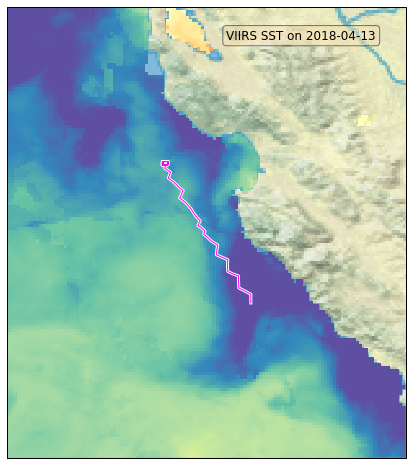

done
done


<Figure size 432x288 with 0 Axes>

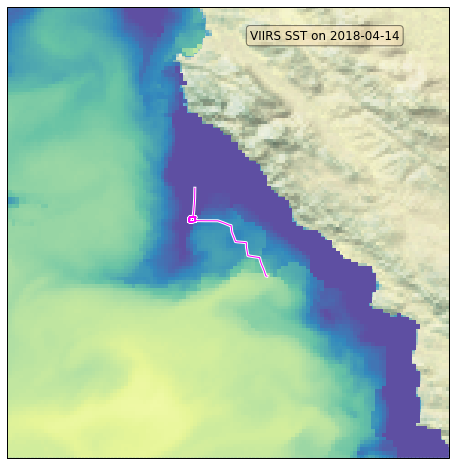

done
done


<Figure size 432x288 with 0 Axes>

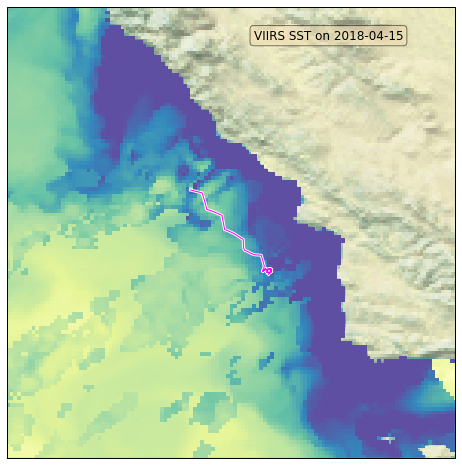

done
done


<Figure size 432x288 with 0 Axes>

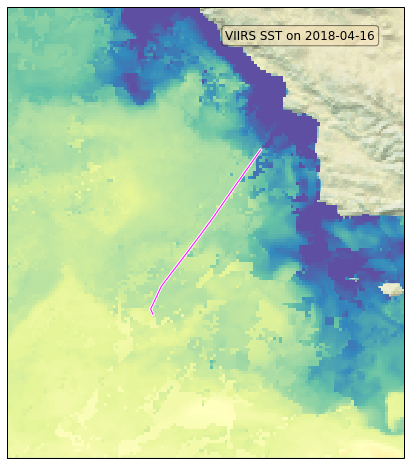

done
done


<Figure size 432x288 with 0 Axes>

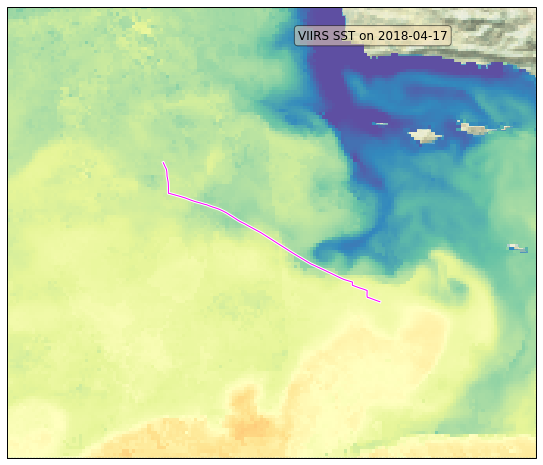

done
done


<Figure size 432x288 with 0 Axes>

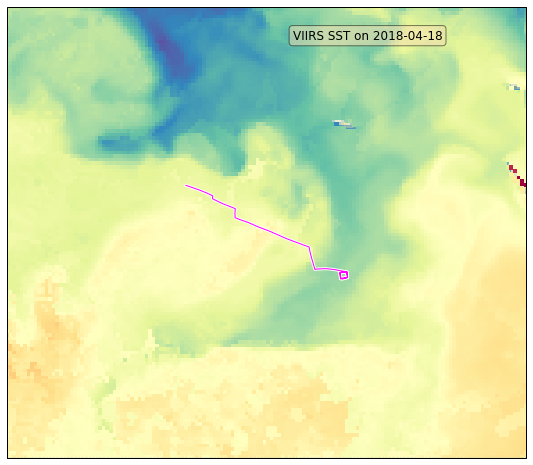

done
done


<Figure size 432x288 with 0 Axes>

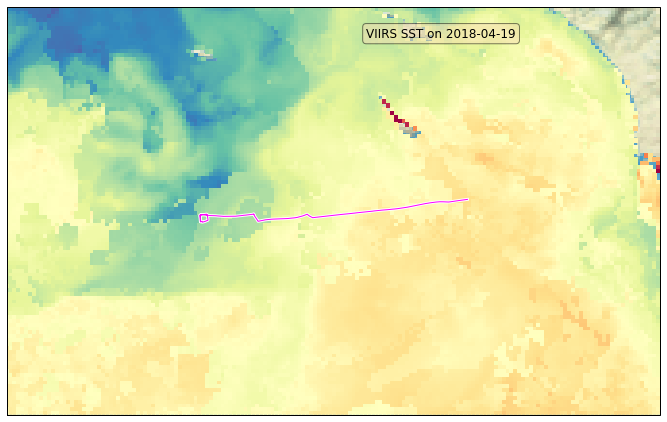

done
done


<Figure size 432x288 with 0 Axes>

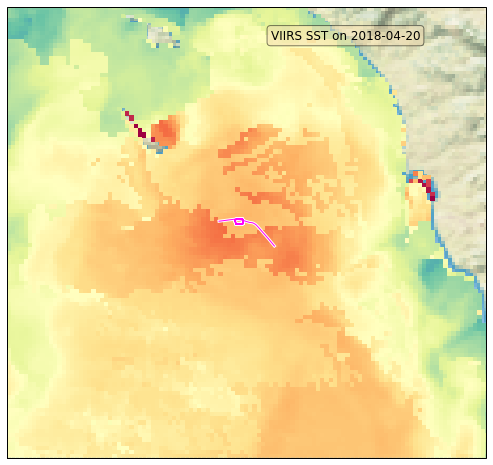

done
done


<Figure size 432x288 with 0 Axes>

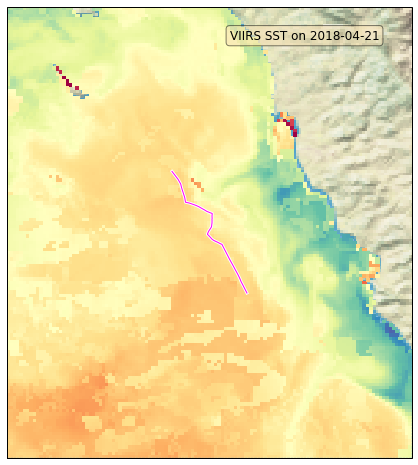

done
done


<Figure size 432x288 with 0 Axes>

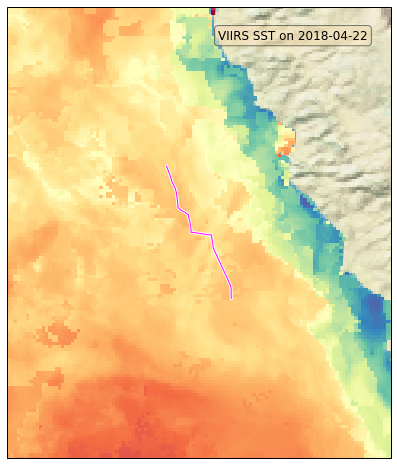

done
done


<Figure size 432x288 with 0 Axes>

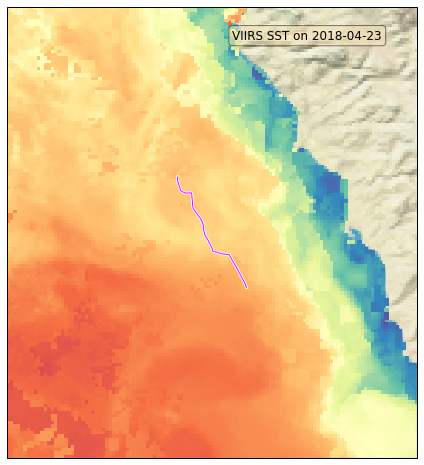

done
done


<Figure size 432x288 with 0 Axes>

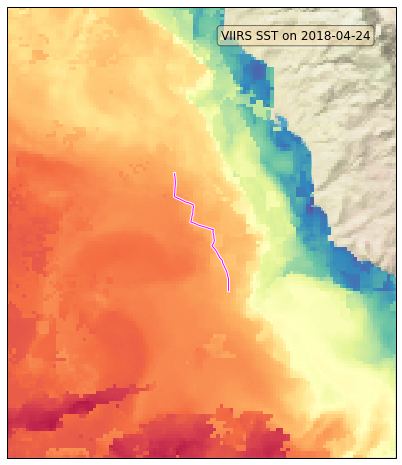

done
done


<Figure size 432x288 with 0 Axes>

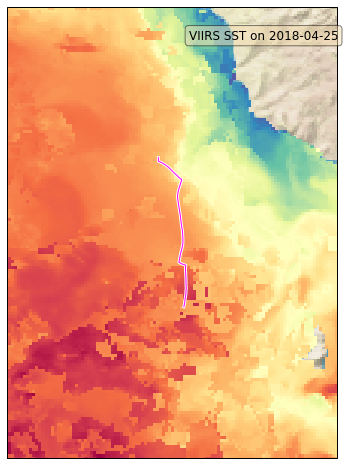

done
done


<Figure size 432x288 with 0 Axes>

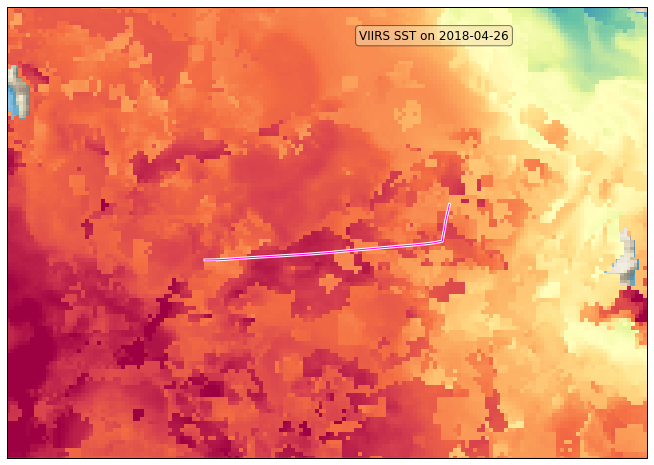

done
done


<Figure size 432x288 with 0 Axes>

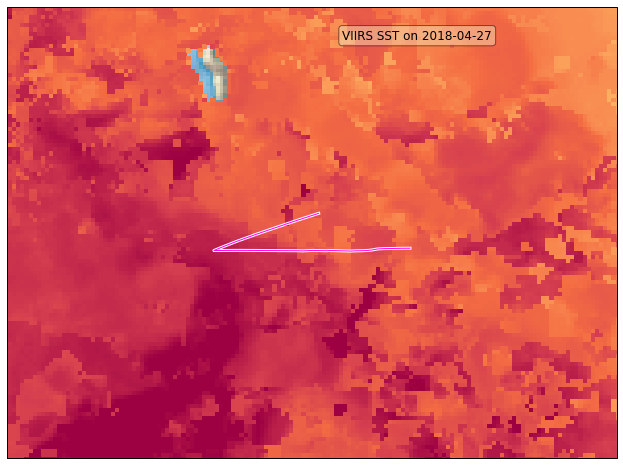

done
done


<Figure size 432x288 with 0 Axes>

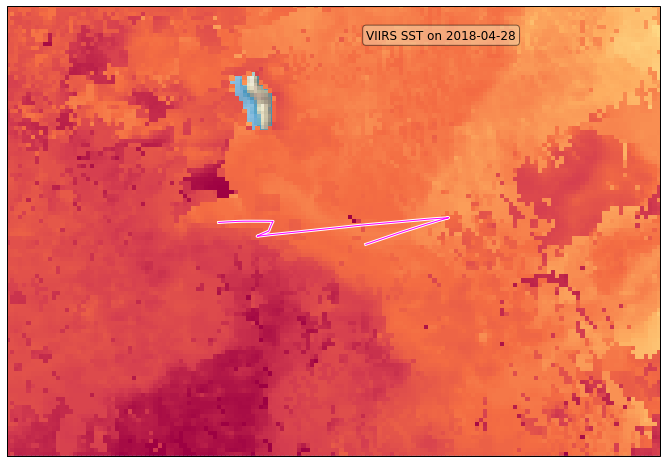

done
done


<Figure size 432x288 with 0 Axes>

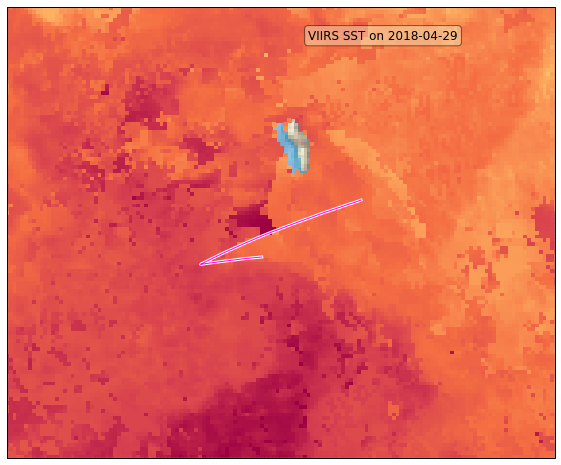

done
done


<Figure size 432x288 with 0 Axes>

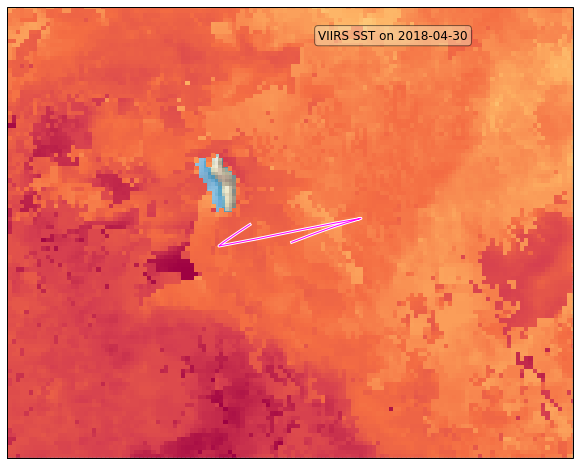

done
done


<Figure size 432x288 with 0 Axes>

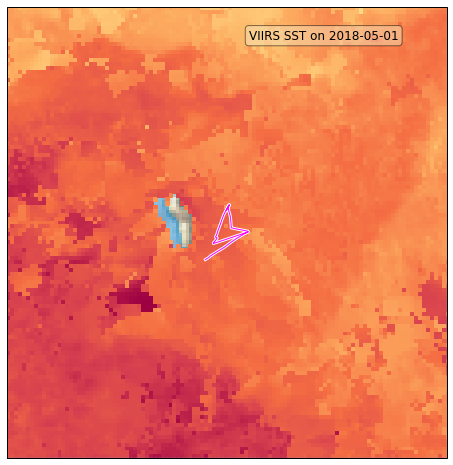

done
done


<Figure size 432x288 with 0 Axes>

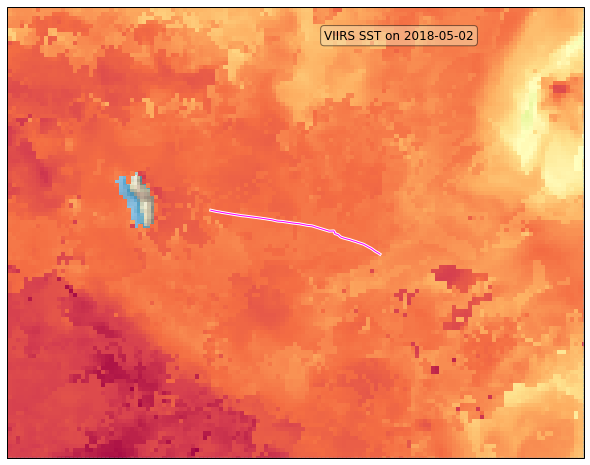

done
done


<Figure size 432x288 with 0 Axes>

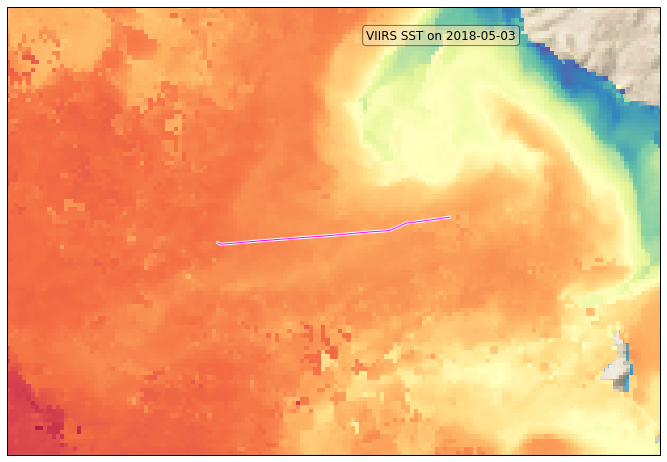

done
done


<Figure size 432x288 with 0 Axes>

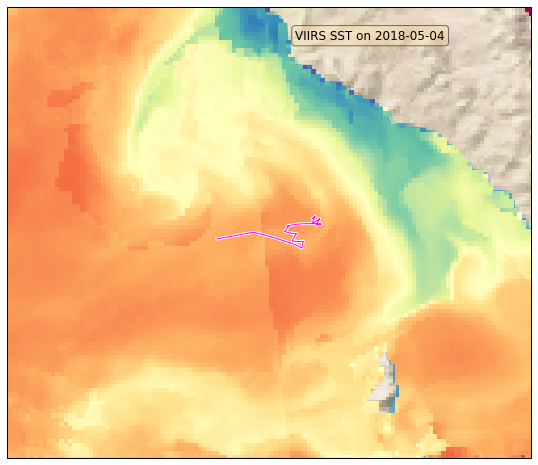

done
done


<Figure size 432x288 with 0 Axes>

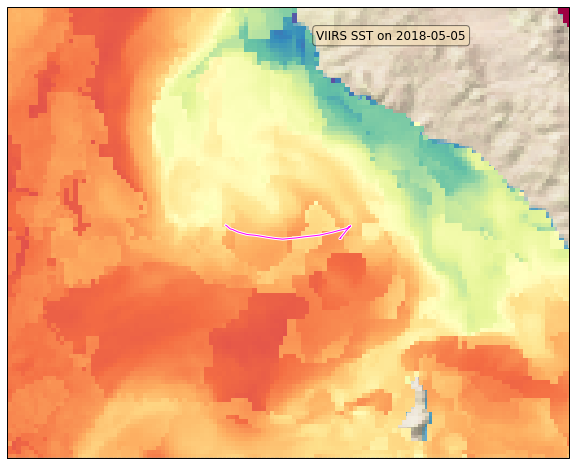

done
done


<Figure size 432x288 with 0 Axes>

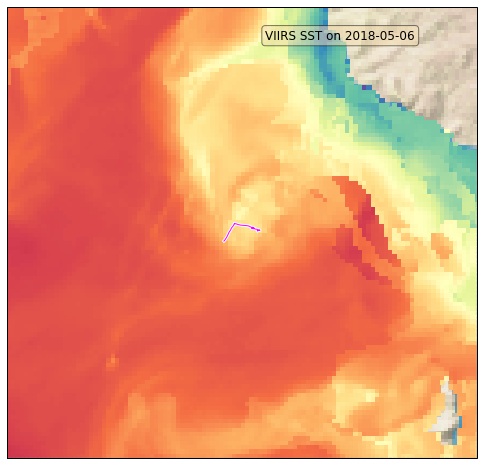

done
done


<Figure size 432x288 with 0 Axes>

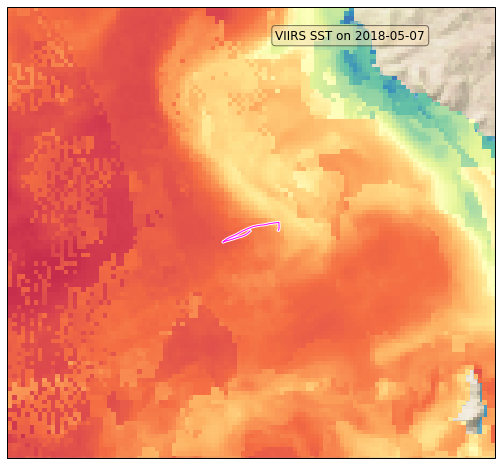

done
done


<Figure size 432x288 with 0 Axes>

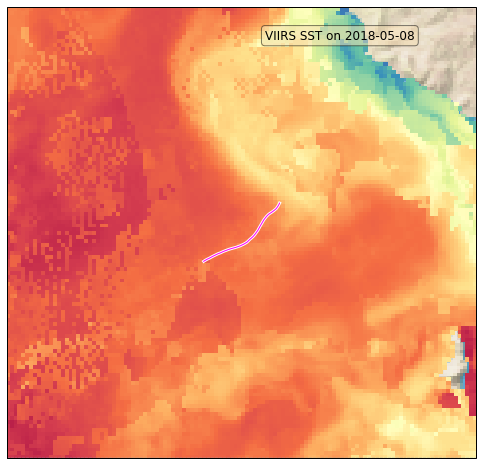

done
done


<Figure size 432x288 with 0 Axes>

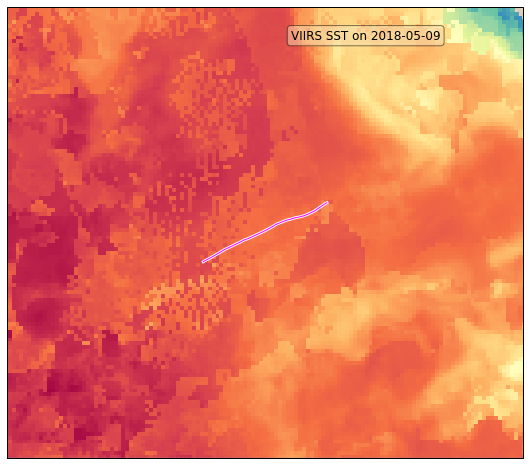

done
done


<Figure size 432x288 with 0 Axes>

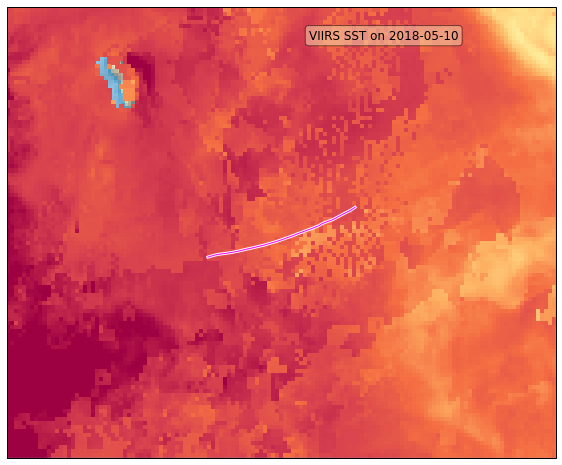

done
done


<Figure size 432x288 with 0 Axes>

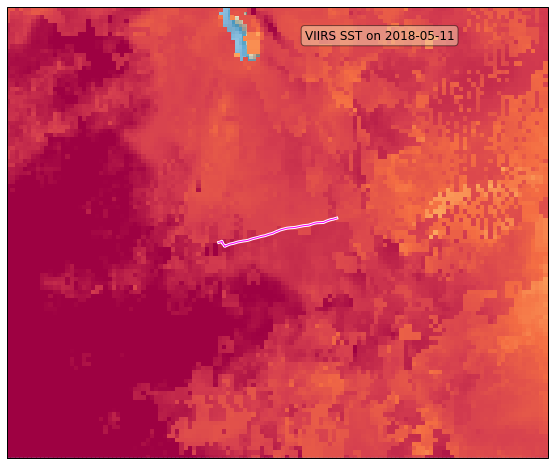

done
done


<Figure size 432x288 with 0 Axes>

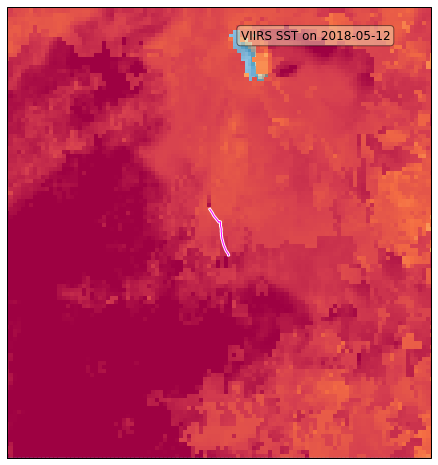

done
done


<Figure size 432x288 with 0 Axes>

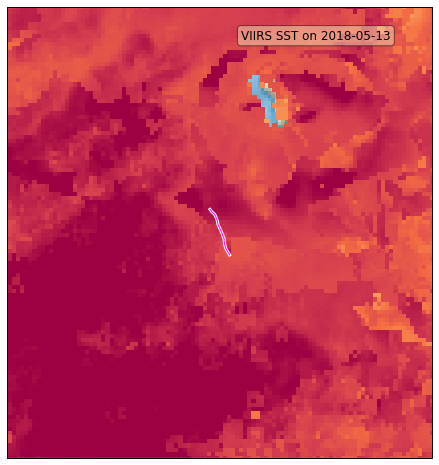

done
done


<Figure size 432x288 with 0 Axes>

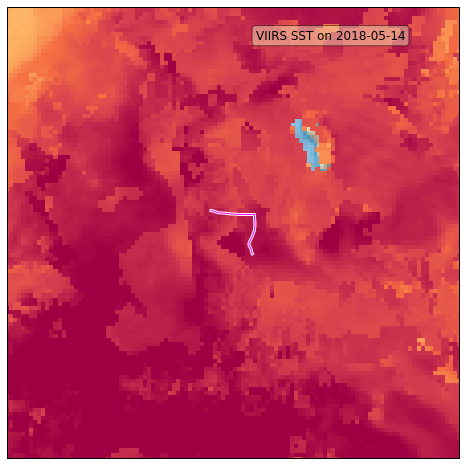

done
done


<Figure size 432x288 with 0 Axes>

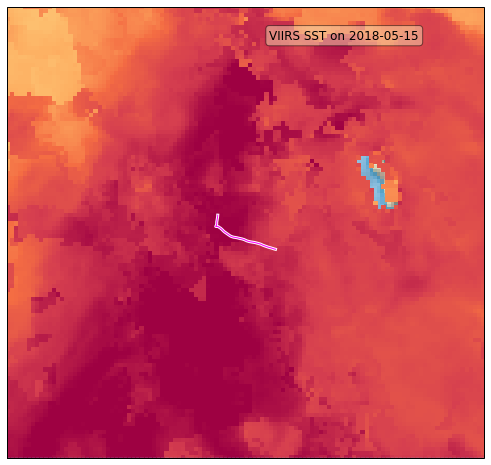

done
done


<Figure size 432x288 with 0 Axes>

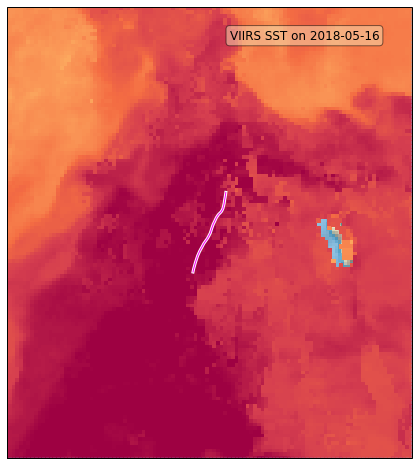

done
done


<Figure size 432x288 with 0 Axes>

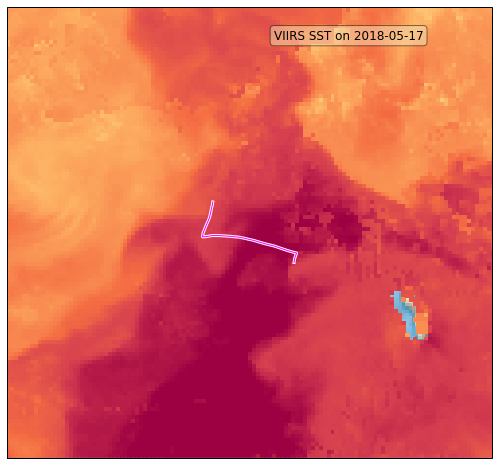

done
done


<Figure size 432x288 with 0 Axes>

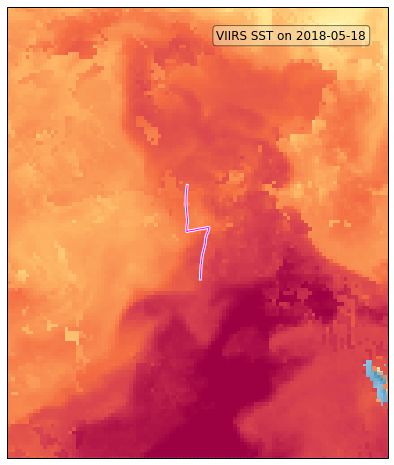

done
done


<Figure size 432x288 with 0 Axes>

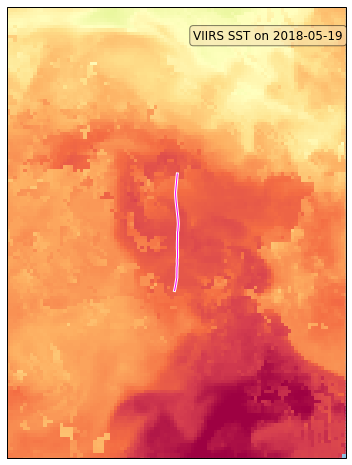

done
done


<Figure size 432x288 with 0 Axes>

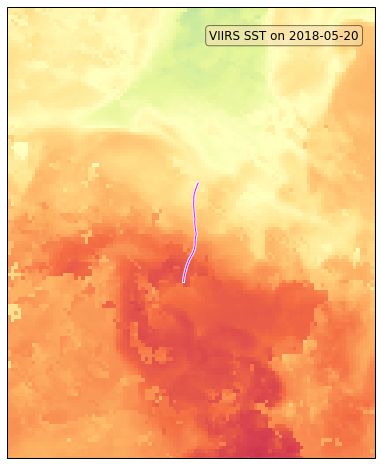

done
done


<Figure size 432x288 with 0 Axes>

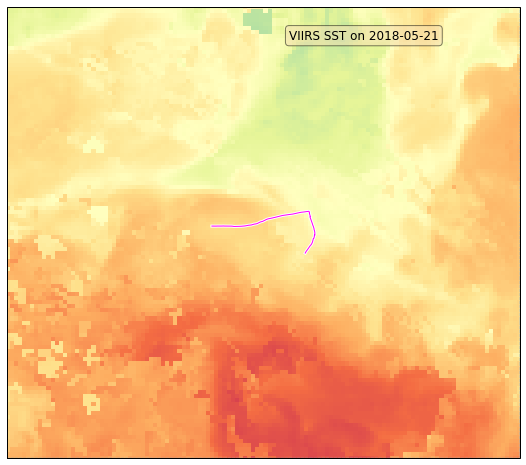

done
done


<Figure size 432x288 with 0 Axes>

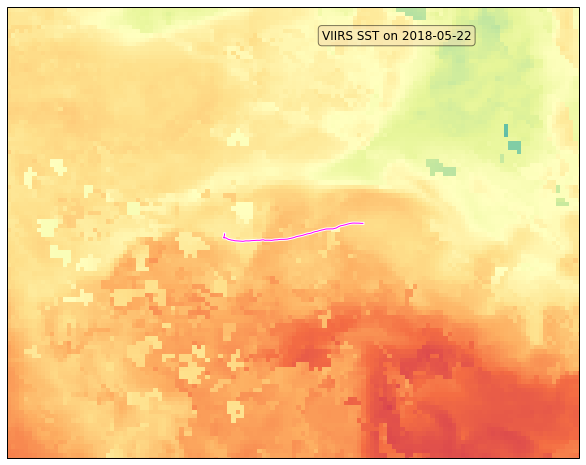

done
done


<Figure size 432x288 with 0 Axes>

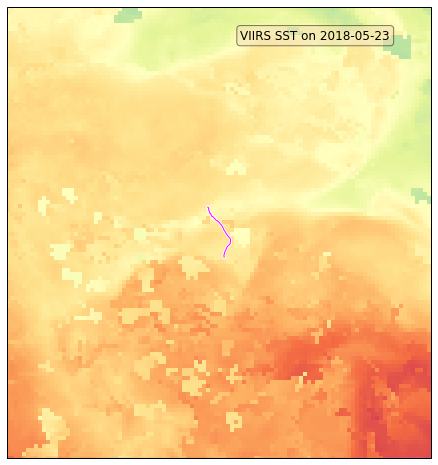

done
done


<Figure size 432x288 with 0 Axes>

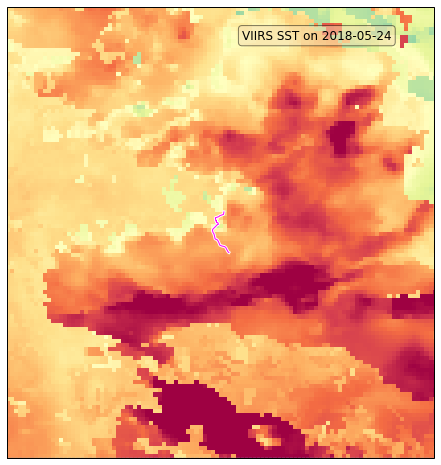

done
done


<Figure size 432x288 with 0 Axes>

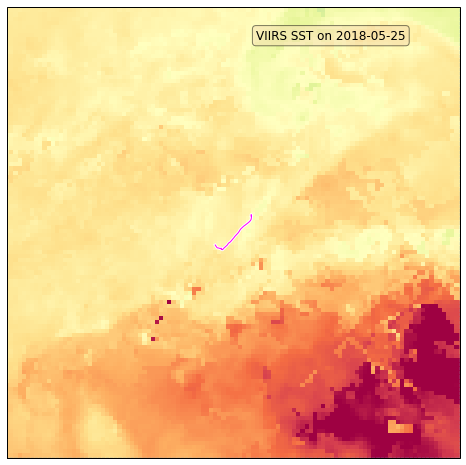

done
done


<Figure size 432x288 with 0 Axes>

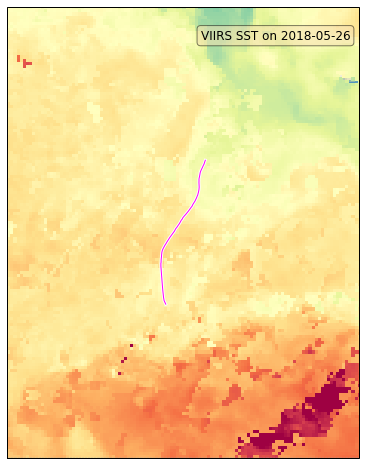

done
done


<Figure size 432x288 with 0 Axes>

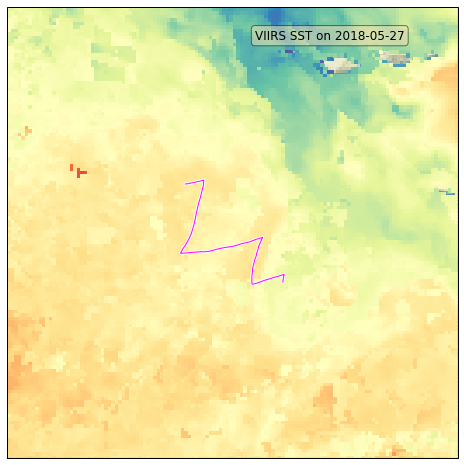

done
done


<Figure size 432x288 with 0 Axes>

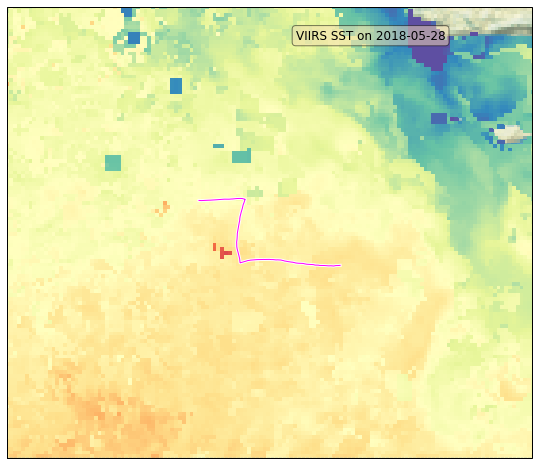

done
done


<Figure size 432x288 with 0 Axes>

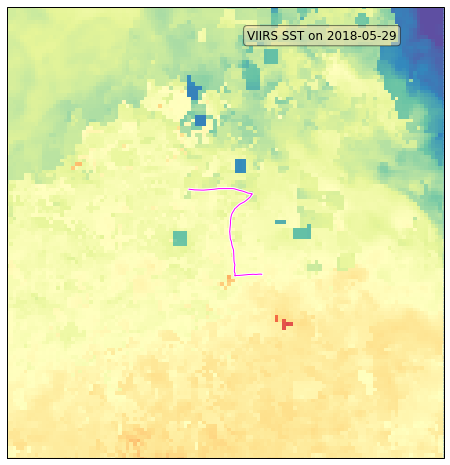

done
done


<Figure size 432x288 with 0 Axes>

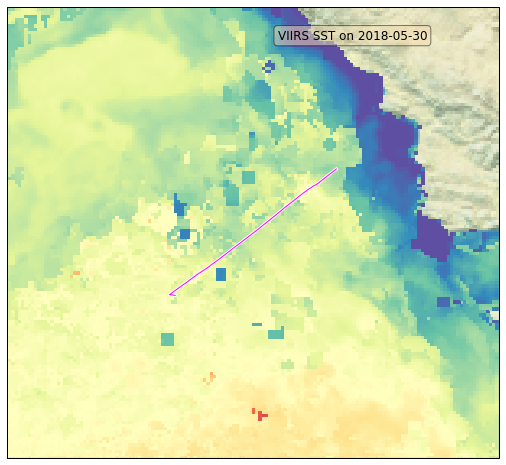

done
done


<Figure size 432x288 with 0 Axes>

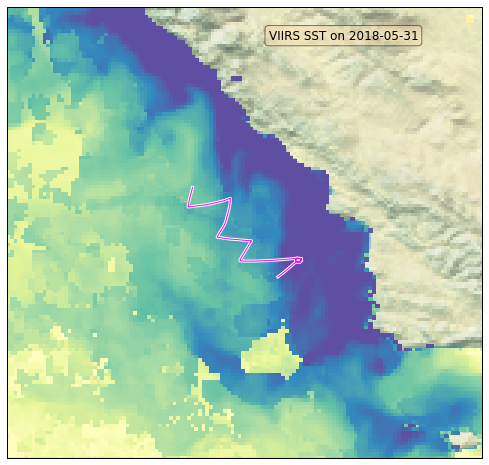

done
done


<Figure size 432x288 with 0 Axes>

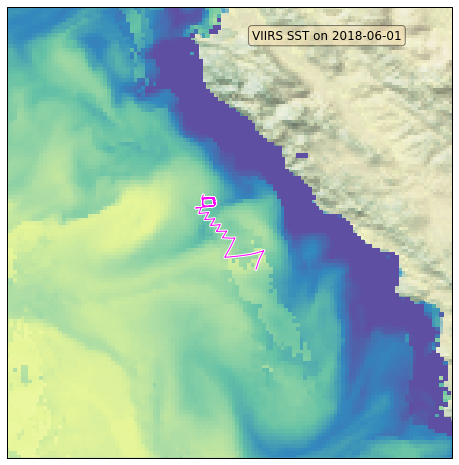

done
done


<Figure size 432x288 with 0 Axes>

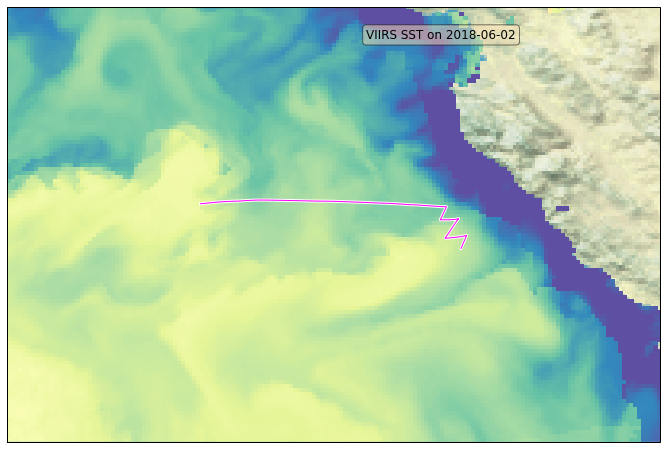

done
done


<Figure size 432x288 with 0 Axes>

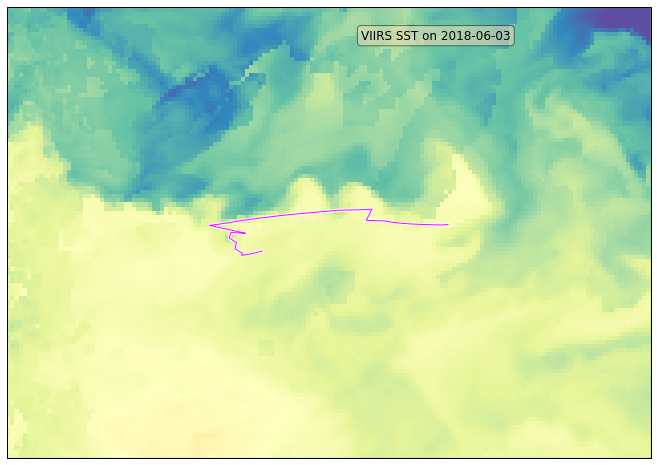

done
done


<Figure size 432x288 with 0 Axes>

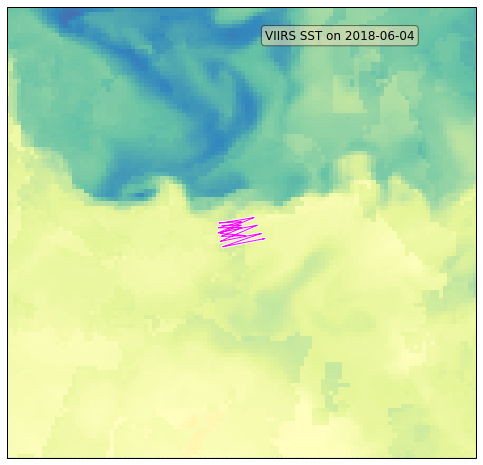

done
done


<Figure size 432x288 with 0 Axes>

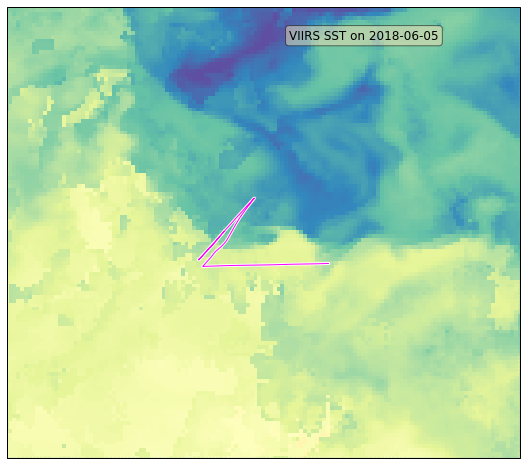

done
done


<Figure size 432x288 with 0 Axes>

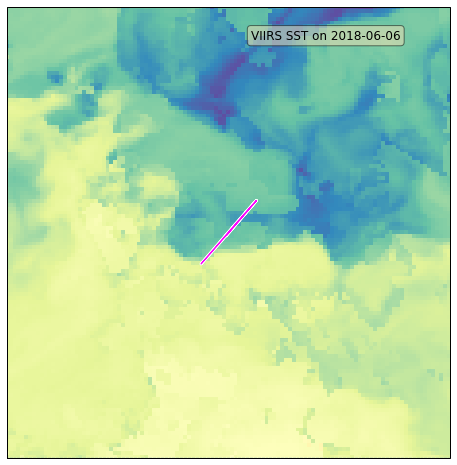

done
done


<Figure size 432x288 with 0 Axes>

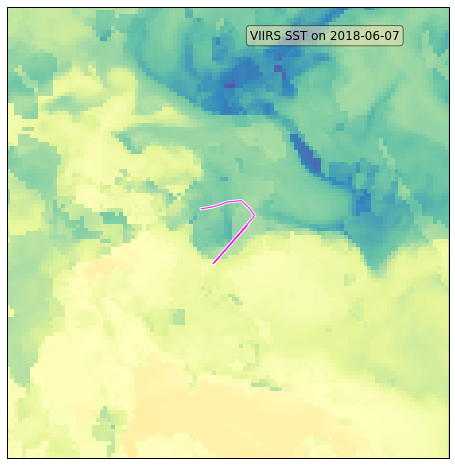

done
done


<Figure size 432x288 with 0 Axes>

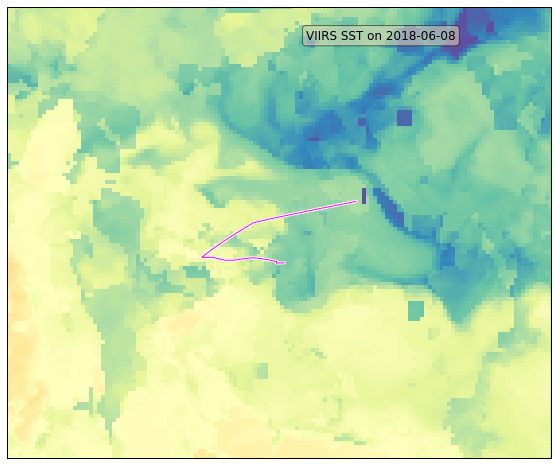

done
done


<Figure size 432x288 with 0 Axes>

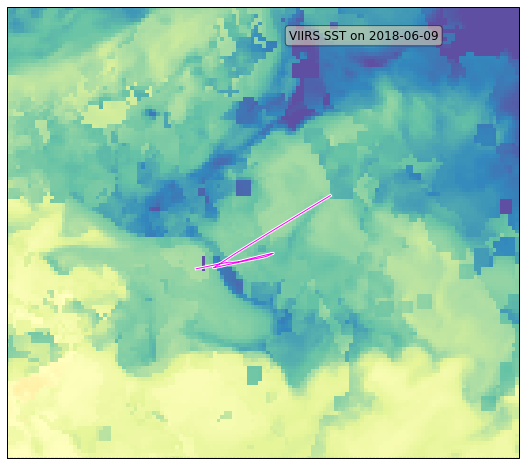

done
done


<Figure size 432x288 with 0 Axes>

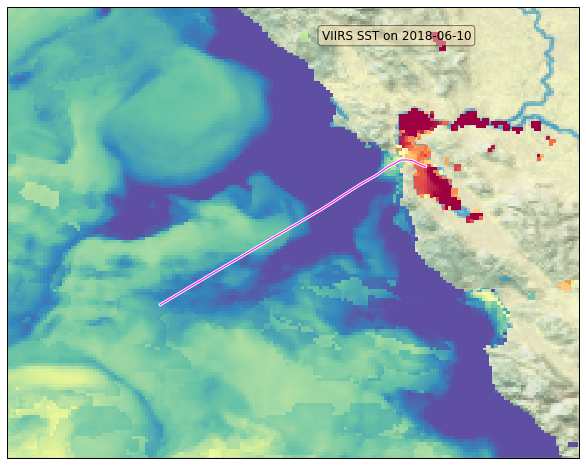

done
done


<Figure size 432x288 with 0 Axes>

In [50]:
import cartopy.crs as ccrs
from cartopy.examples.arrows import sample_data
ds2=[]
for i in range(103,162):
    filename = 'F:/data/cruise_data/saildrone/baja-2018/sat_data/virs_sst/sst'+str(i)+'.nc'
    ds = xr.open_dataset(filename)
    if i==103:
        ds2 = ds
    else:
        #ds2 = ds.where(np.isfinite(ds2.sea_surface_temperature),ds.sea_surface_temperature)
        #ds2 = ds.where(np.isfinite(ds2.sea_surface_temperature),ds.sea_surface_temperature)
        ds2 = ds.where(np.isfinite(ds.sea_surface_temperature),ds2.sea_surface_temperature)
#    ds2.append(ds)
    ds.close()
#    combined = xr.concat(ds2, dim='time')
#    mn=combined.sea_surface_temperature.mean(dim='time')
    mn = ds2.sea_surface_temperature
    combined = ds2.sea_surface_temperature
    lat,lon=combined.lat,combined.lon
    cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap
    fig = plt.figure(figsize=(11.7,8.3))
    ax = plt.subplot(111,projection=ccrs.PlateCarree())
    ax.background_img(name='natural-earth-1', resolution='large')
#    ax.background_img(name='BM', resolution='high')
#    ax.background_img(name='ne_shaded', resolution='low')
    lat_grid, lon_grid = np.meshgrid(lat, lon)
    cs = ax.pcolormesh(lon_grid,lat_grid, mn.transpose() - 273.15, cmap=cmap, vmin = 12, vmax = 19)
    sub_lons=lons_usv[dataset.time.dt.dayofyear==i]
    sub_lats=lats_usv[dataset.time.dt.dayofyear==i]
    ax.plot(sub_lons,sub_lats,'w', linewidth=3)
    ax.plot(sub_lons,sub_lats,color='magenta', linewidth=1)
    dx=1
    ax.set_extent((sub_lons.min()-dx,sub_lons.max()+dx,sub_lats.min()-dx,sub_lats.max()+dx))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    textstr = 'VIIRS SST on ' + str(dataset.time[dataset.time.dt.dayofyear==i][0].data)[0:10]
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
    plt.show() 
    filename_png='F:/data/cruise_data/saildrone/baja-2018/figs/daily_cruise_viirs_ssts/cruise_sst_'+ str(i) +'_zoom.png'
    fig.savefig(filename_png, transparent=False, format='png')
    print('done') 
    ax.plot(lons_usv,lats_usv,'w', linewidth=3)
    ax.plot(lons_usv,lats_usv,color='magenta', linewidth=1)
    #ax.colorbar(location="bottom",label='SST [C]') # draw colorbar
    ax.set_extent((lons_usv.min()-1*dx,lons_usv.max()+1*dx,lats_usv.min()-1*dx,lats_usv.max()+1*dx))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    textstr = 'VIIRS SST on ' + str(dataset.time[dataset.time.dt.dayofyear==i][0].data)[0:10]
    ax.text(0.55, 0.95, textstr, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)
    plt.show()
    filename_png='F:/data/cruise_data/saildrone/baja-2018/figs/daily_cruise_viirs_ssts/cruise_sst_'+ str(i) +'2.png'
    fig.savefig(filename_png, transparent=False, format='png')
    print('done')
    plt.clf()


In [ ]:
filename = 'F:/data/cruise_data/saildrone/baja-2018/sat_data/virs_sst/sst147.nc'
ds = xr.open_dataset(filename)
ds.sea_surface_temperature.plot()


In [ ]:
filename = 'F:/data/cruise_data/saildrone/baja-2018/sat_data/virs_sst/sst148.nc'
ds2 = xr.open_dataset(filename)
ds2.sea_surface_temperature.plot()

In [ ]:
ds3 = ds.where(np.isfinite(ds.sea_surface_temperature),ds2.sea_surface_temperature)
ds3.sea_surface_temperature.plot()

In [ ]:
ds2=[]
for i in range(101,102): #162):
    filename = 'F:/data/cruise_data/saildrone/baja-2018/sat_data/virs_sst/sst'+str(i)+'.nc'
    ds = xr.open_dataset(filename)
    ds2.append(ds)
    ds.close()
    combined = xr.concat(ds2, dim='time')
    mn=combined.sea_surface_temperature.mean(dim='time')
    lat,lon=combined.lat,combined.lon
    cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap
    fig = plt.figure(figsize=(11.7,8.3))
    m = Basemap(projection='merc', lat_0 = 27, lon_0 = -120,    resolution = 'i', area_thresh = 0.1,    
                              llcrnrlon=-126.0, llcrnrlat=26.0,urcrnrlon=-114.0, urcrnrlat=39.)
    m.bluemarble()
    #    m.fillcontinents(color='grey',lake_color='white')
    lat_grid, lon_grid = np.meshgrid(lat, lon)
    x,y = m(lon_grid,lat_grid)
    cs = m.pcolormesh(x,y, mn.transpose() - 273.15, cmap=cmap, vmin = 12, vmax = 19)
#    sub_lons=lons_usv
#    sub_lats=lats_usv
    sub_lons=lons_usv[dataset.time.dt.dayofyear==i]
    sub_lats=lats_usv[dataset.time.dt.dayofyear==i]
    x,y = m(sub_lons,sub_lats)
    m.plot(x,y,'w', linewidth=3)
    m.plot(x,y,color='magenta', linewidth=1)
    m.colorbar(location="bottom",label='SST [C]') # draw colorbar

    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    m.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,verticalalignment='top', bbox=props)

    plt.show()
    filename_png='F:/data/cruise_data/saildrone/baja-2018/figs/daily_cruise_viirs_ssts/cruise_viirs_sst_ave.png'
    fig.savefig(filename_png, transparent=False, format='png')
    print('done') 


In [ ]:
ds2=[]
for i in range(100,162):
    filename = 'F:/data/cruise_data/saildrone/baja-2018/sat_data/virs_sst/sst'+str(i)+'.nc'
    ds = xr.open_dataset(filename)
    ds2.append(ds)
    ds.close()
combined = xr.concat(ds2, dim='time')
mn=combined.sea_surface_temperature.mean(dim='time')
lat,lon=combined.lat,combined.lon
cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap
fig = plt.figure(figsize=(11.7,8.3))
m = Basemap(projection='merc', lat_0 = 27, lon_0 = -120,    resolution = 'i', area_thresh = 0.1,    
                          llcrnrlon=-126.0, llcrnrlat=26.0,urcrnrlon=-114.0, urcrnrlat=39.)
m.bluemarble()
#    m.fillcontinents(color='grey',lake_color='white')
lat_grid, lon_grid = np.meshgrid(lat, lon)
x,y = m(lon_grid,lat_grid)
cs = m.pcolormesh(x,y, mn.transpose() - 273.15, cmap=cmap, vmin = 12, vmax = 19)
sub_lons=lons_usv
sub_lats=lats_usv
x,y = m(sub_lons,sub_lats)
m.plot(x,y,'w', linewidth=3)
m.plot(x,y,color='magenta', linewidth=1)
m.colorbar(location="bottom",label='SST [C]') # draw colorbar
plt.show()
filename_png='F:/data/cruise_data/saildrone/baja-2018/figs/cruise_viirs_sst_ave.png'
fig.savefig(filename_png, transparent=False, format='png')
print('done') 


In [ ]:
d = dt.datetime(2018,5,10)
ds = xr.open_dataset('https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/JPL/MUR/v4.1/2018/'+str(d.timetuple().tm_yday)+'/2018'+str(d.month).zfill(2)+str(d.day).zfill(2)+'090000-JPL-L4_GHRSST-SSTfnd-MUR-GLOB-v02.0-fv04.1.nc')
ds.close()
ds_sub = ds.sel(lat=slice(26,39),lon=slice(-126,-114))
mn,lat,lon = ds_sub.analysed_sst[0,:,:].copy(deep=True),ds_sub.lat,ds_sub.lon
#with mur
cmap = colorbrewer.get_map('Spectral', 'diverging', 11, reverse=True).mpl_colormap
fig = plt.figure(figsize=(11.7,8.3))
m = Basemap(projection='merc', lat_0 = 27, lon_0 = -120,    resolution = 'l', area_thresh = 0.1,    
                          llcrnrlon=-126.0, llcrnrlat=26.0,urcrnrlon=-114.0, urcrnrlat=39.)
m.bluemarble()
#    m.fillcontinents(color='grey',lake_color='white')
lat_grid, lon_grid = np.meshgrid(lat, lon)
x,y = m(lon_grid,lat_grid)
cs = m.pcolormesh(x,y, mn.transpose()-273.15, cmap=cmap, vmin = 13, vmax = 19)
sub_lons=lons_usv
sub_lats=lats_usv
x,y = m(sub_lons,sub_lats)
m.plot(x,y,'w', linewidth=3)
m.plot(x,y,color='magenta', linewidth=1)
m.colorbar(location="bottom",label='SST [C]') # draw colorbar
plt.show()
filename_png='F:/data/cruise_data/saildrone/baja-2018/figs/cruise_mur_sst_ave.png'
fig.savefig(filename_png, transparent=False, format='png')
print('done') 

In [ ]:
print(lats_usv.min().data,lats_usv.max().data)
glat = np.arange(lats_usv.min(),lats_usv.max(),.05)
glon = np.arange(lons_usv.min(),lons_usv.max(),.05)
longrid,latgrid= np.meshgrid(glon, glat)
# Bin the data onto a 10x10 grid
# Have to reverse x & y due to row-first indexing
zi, yi, xi = np.histogram2d(ds.lat, ds.lon, bins=(glat,glon), weights=ds.sea_surface_temperature, normed=False)
counts, _, _ = np.histogram2d(ds.lat, ds.lon, bins=(glat,glon))
#zi = zi / counts
#zi = np.ma.masked_invalid(zi)


In [ ]:
ds

In [ ]:
filename='https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L2P/VIIRS_N20/OSPO/v2.61/2018/100/20180410014000-OSPO-L2P_GHRSST-SSTsubskin-VIIRS_N20-ACSPO_V2.61-v02.0-fv01.0.nc'
ds=xr.open_dataset(filename)
ds.close()
ds

In [ ]:
plt.pcolormesh(ds.lon, ds.lat, ds.sea_surface_temperature[0,:,:])


In [ ]:
from scipy.interpolate import RectSphereBivariateSpline
#’’’We want to interpolate it to a global x-degree grid’’’
deg2rad = np.pi/180.
grid_size_deg = .01
new_lats = np.linspace(grid_size_deg, 180, 180/grid_size_deg)
new_lons = np.linspace(grid_size_deg, 360, 360/grid_size_deg)
new_lats_mesh, new_lons_mesh = np.meshgrid(new_lats*deg2rad, new_lons*deg2rad)
#’’’We need to set up the interpolator object’’’
lut = RectSphereBivariateSpline(ds.lat*deg2rad, ds.lon*deg2rad, ds.sea_surface_temperature)
#’’’Finally we interpolate the data. The RectSphereBivariateSpline
#object only takes 1-D arrays as input, therefore we need to do some reshaping.’’’
new_lats = new_lats_mesh.ravel()
new_lons = new_lons_mesh.ravel()
data_interp = lut.ev(new_lats,new_lons)


In [ ]:
new_lats